Data Source
- [LIP LOOK INTO PERSON](https://sysu-hcp.net/lip/contact.php)
    - [Shared Google Drive](https://drive.google.com/drive/folders/0BzvH3bSnp3E9ZW9paE9kdkJtM3M?resourcekey=0-vgKJX42GVFaAwjhEWAncjQ) (Human_Parsing_Dataset)

# Functions

1) assign_random_colors

In [123]:
import random

def assign_random_colors(indices): # Input: list of "non-duplicated" indices
    colors = {} 
    
    for index in indices:
        # generate random RGB colors
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        colors[index] = color
    
    return colors # Output: dict

# 사용 예시
# unique_indices = [1, 2, 3, 4, 5] 
# random_colors = assign_random_colors(unique_indices)
# print(random_colors)

# LIP

Labels to Index
    
- README_parsing.md

```
<Classes>
1.Hat
2.Hair
3.Glove
4.Sunglasses
5.UpperClothes
6.Dress
7.Coat
8.Socks
9.Pants
10.Jumpsuits
11.Scarf
12.Skirt
13.Face
14.Left-arm
15.Right-arm
16.Left-leg
17.Right-leg
18.Left-shoe
19.Right-shoe
```

## .py

In [109]:
import os
import cv2
from PIL import Image
import numpy as np
from tqdm import tqdm


label2index = {'Back_ground': 0, # 19 Labels (README_parsing.md)
                'Hat': 1,
                'Hair': 2,
                'Glove': 3,
                'Sunglasses': 4,
                'UpperClothes': 5,
                'Dress': 6,
                'Coat': 7, 
                'Socks': 8, 
                'Pants': 9, 
                'Jumpsuits': 10, 
                'Scarf': 11, 
                'Skirt': 12, 
                'Face': 13, 
                'Left_arm': 14, 
                'Right_arm': 15, 
                'Left_leg': 16, 
                'Right_leg': 17, 
                'Left_shoe': 18,
                'Right_shoe': 19}


##################################################################################################################################################################################################
train_seg_path = 'D:\\알파코\\Human_Parsing_Dataset\\LIP-20240218T075508Z-001\\LIP\\TrainVal_parsing_annotations\\TrainVal_parsing_annotations\\TrainVal_parsing_annotations\\train_segmentations'
val_seg_path = 'D:\\알파코\\Human_Parsing_Dataset\\LIP-20240218T075508Z-001\\LIP\\TrainVal_parsing_annotations\\TrainVal_parsing_annotations\\TrainVal_parsing_annotations\\val_segmentations'

# train_seg_images = sorted(os.listdir(train_seg_path)) # type: list
# val_seg_images = sorted(os.listdir(val_seg_path)) # type: list
# images = train_seg_images[0:10]
##################################################################################################################################################################################################


def check_image(base_path, images, label_dict=label2index): # Folder and image path specification required
    
    # Ourput
    Output_lst = [] # image_name, indexs, pixcel_values
    
    
    # Import image path
    images_path = [os.path.join(base_path, image) for image in images]
    # print(images_path)
    
    
    # Define Image size
    for img_path in tqdm(images_path, desc="Processing images"):
        
        segmentation_image = Image.open(img_path)
        width, height = segmentation_image.size

        # print(image)
        # print(f'Type: {type(segmentation_image)}')
        # print(f'Size of Image: {segmentation_image.size}')
        # print(f'Width of Image: {width}')
        # print(f'Height of Image: {height}')
        # segmentation_image.show()
        
        
        # Check pixel values
        pixcel_values = []
        label_names = []
        for y in range(height): 
            for x in range(width):
                pixel_value = segmentation_image.getpixel((x, y))
                label_name = list(label2index.keys())[list(label2index.values()).index(pixel_value)]
                pixcel_values.append(pixel_value)
                label_names.append(label_name)
                
                # print(image)
                # print(f"Pixcel value at coordinate({x}, {y}): {pixel_value}")
                # print(f'Class: {label_name}')
                # print(f'Index: {pixel_value}, Class: {label_name}', '\n')

            index_lst = list(set(pixcel_values)) # non-duplicated
            label_lst = list(set(label_names))
        
            index_lst.sort()
            label_lst.sort()
            
        # visualize image
        segmentation_image.show()
        
        
        # Get image name
        image_name = os.path.basename(img_path)
        
        
        # Append Outputs
        Output_lst.append([image_name, index_lst, label_lst, (width, height)])
    
    
    return Output_lst

### Code Test

In [110]:
train_seg_path = 'D:\\알파코\\Human_Parsing_Dataset\\LIP-20240218T075508Z-001\\LIP\\TrainVal_parsing_annotations\\TrainVal_parsing_annotations\\TrainVal_parsing_annotations\\train_segmentations'
train_seg_images = sorted(os.listdir(train_seg_path))
input_images = train_seg_images[120:121]

In [11]:
test = check_image(train_seg_path, input_images)

Processing images: 100%|██████████| 1/1 [00:03<00:00,  3.95s/it]


In [12]:
print(len(test))
test

1


[['10249_1210047.png',
  [0, 2, 11, 13],
  ['Back_ground', 'Face', 'Hair', 'Scarf']]]

## .ipynb

In [184]:
import os
import cv2
from PIL import Image
import numpy as np
from tqdm import tqdm

In [124]:
# 19 Labels (README_parsing.md)

label2index = {'Back_ground': 0,
                'Hat': 1,
                'Hair': 2,
                'Glove': 3,
                'Sunglasses': 4,
                'UpperClothes': 5,
                'Dress': 6,
                'Coat': 7, 
                'Socks': 8, 
                'Pants': 9, 
                'Jumpsuits': 10, 
                'Scarf': 11, 
                'Skirt': 12, 
                'Face': 13, 
                'Left_arm': 14, 
                'Right_arm': 15, 
                'Left_leg': 16, 
                'Right_leg': 17, 
                'Left_shoe': 18,
                'Right_shoe': 19}

print(type(label2index))
print(label2index.keys())

<class 'dict'>
dict_keys(['Back_ground', 'Hat', 'Hair', 'Glove', 'Sunglasses', 'UpperClothes', 'Dress', 'Coat', 'Socks', 'Pants', 'Jumpsuits', 'Scarf', 'Skirt', 'Face', 'Left_arm', 'Right_arm', 'Left_leg', 'Right_leg', 'Left_shoe', 'Right_shoe'])


In [19]:
train_seg_path = 'D:\\알파코\\Human_Parsing_Dataset\\LIP-20240218T075508Z-001\\LIP\\TrainVal_parsing_annotations\\TrainVal_parsing_annotations\\TrainVal_parsing_annotations\\train_segmentations'
val_seg_path = 'D:\\알파코\\Human_Parsing_Dataset\\LIP-20240218T075508Z-001\\LIP\\TrainVal_parsing_annotations\\TrainVal_parsing_annotations\\TrainVal_parsing_annotations\\val_segmentations'

train_seg_images = sorted(os.listdir(train_seg_path)) # type: list
val_seg_images = sorted(os.listdir(val_seg_path)) # type: list


print(f'Number of TrainVal Images: {len(train_seg_images) + len(val_seg_images)}' '\n')
print(f'Number of Train Images: {len(train_seg_images)}')
print(f'Number of Train Images: {len(val_seg_images)}')

Number of TrainVal Images: 40462

Number of Train Images: 30462
Number of Train Images: 10000


In [41]:
train_seg_images[0]

'1000_1234574.png'

In [35]:
image = train_seg_images[0] # 1000_1234574.png
image_path = os.path.join(train_seg_path, image)

print(f'current path: {os.getcwd()}')
print(f'Image path: {image_path}')

current path: d:\알파코\Codes_Jay
Image path: D:\알파코\Human_Parsing_Dataset\LIP-20240218T075508Z-001\LIP\TrainVal_parsing_annotations\TrainVal_parsing_annotations\TrainVal_parsing_annotations\train_segmentations\1000_1234574.png


In [89]:
segmentation_image = Image.open(image_path)
width, height = segmentation_image.size

print(f'Type: {type(segmentation_image)}')
print(f'Size of Image: {segmentation_image.size}')
print(f'Width of Image: {width}')
print(f'Height of Image: {height}')

segmentation_image.show()

Type: <class 'PIL.PngImagePlugin.PngImageFile'>
Size of Image: (84, 230)
Width of Image: 84
Height of Image: 230


In [138]:
# Check pixel values

pixcel_values = []


for y in range(height): 
    for x in range(width):
        pixel_value = segmentation_image.getpixel((x, y))
        pixcel_values.append(pixel_value)
        label_name = list(label2index.keys())[list(label2index.values()).index(pixel_value)]
        
        # print(f"Pixcel value at coordinate({x}, {y}): {pixel_value}")
        # print(f'Class: {label_name}')
        print(f'Index: {pixel_value}, Class: {label_name}', '\n')


index_lst = list(set(pixcel_values)) # non-duplicated

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0, Class: Back_ground 

Index: 0

In [ ]:
# generate randm colors

colors = assign_random_colors(index_lst)
colors

# Visualize Image
for y in range(height):
    for x in range(width):
        pixel_value = segmentation_image.getpixel((x, y))
        color = colors[pixel_value]
        print(f"Coordinates: ({x}, {y})")
        print(f"Pixel value: {pixel_value}")
        print(f"Color: {color}")
        print(f"Type of color: {type(color)}")
        # 해당 좌표의 픽셀값을 설정합니다.
        segmentation_image.putpixel((x, y), color)

# 이미지를 화면에 표시합니다.
segmentation_image.show()

In [122]:
print(f'Number of pixcels: {len(index_lst)}') # 19320 = 84 * 230
print(f'labels_lst: {index_lst}')

Number of pixcels: 12
labels_lst: [0, 1, 5, 8, 9, 13, 14, 15, 16, 17, 18, 19]


# ATR

In [19]:
folder_path = 'D:\\알파코\\Human_Parsing_Dataset\\ATR-20240218T075505Z-001\\ATR\\ICCV15_fashion_dataset(ATR)\\humanparsing\\SegmentationClassAug'
seg_images = sorted(os.listdir(folder_path))
input_images = seg_images[1000:1001]

ATR_test = check_image(folder_path, input_images)

Processing images:   0%|          | 0/1 [00:00<?, ?it/s]

Processing images: 100%|██████████| 1/1 [00:04<00:00,  4.95s/it]


In [20]:
ATR_test

[['2500_19.png',
  [0, 2, 4, 5, 9, 10, 11, 12, 13, 14, 15],
  ['Back_ground',
   'Face',
   'Hair',
   'Jumpsuits',
   'Left_arm',
   'Pants',
   'Right_arm',
   'Scarf',
   'Skirt',
   'Sunglasses',
   'UpperClothes']]]

In [22]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def visualize_image(image_path, label_dict=label2index):
    # Import image
    segmentation_image = Image.open(image_path)
    width, height = segmentation_image.size

    # Check pixel values and visualize
    pixels = []
    for y in range(height): 
        for x in range(width):
            pixel_value = segmentation_image.getpixel((x, y))
            pixels.append(pixel_value)
    
    # Create image from pixel values
    pixel_image = []
    for i in range(0, len(pixels), width):
        pixel_image.append(pixels[i:i+width])

    plt.imshow(pixel_image, cmap='viridis', interpolation='nearest')
    plt.axis('off')
    plt.show()


In [27]:
# 예시 사용법
base_path = 'D:\\알파코\\Human_Parsing_Dataset\\ATR-20240218T075505Z-001\\ATR\\ICCV15_fashion_dataset(ATR)\\humanparsing\\SegmentationClassAug'
# image_name = "example_image.jpg"
image_name = '2500_190.png'

image_path = os.path.join(base_path, image_name)

# label_dict는 픽셀 값에 대한 클래스 레이블을 포함하는 딕셔너리입니다.
# label_dict = {0: "background", 1: "person", 2: "car", ...}

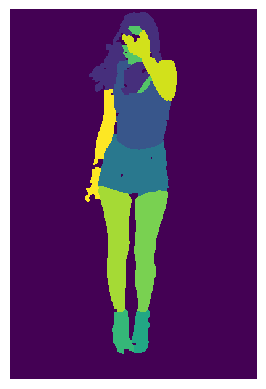

In [64]:
# 이미지 시각화
visualize_image(image_path)

In [56]:
import os

train_seg_path = 'D:\\알파코\\Human_Parsing_Dataset\\LIP-20240218T075508Z-001\\LIP\\TrainVal_parsing_annotations\\TrainVal_parsing_annotations\\TrainVal_parsing_annotations\\train_segmentations'
train_seg_images = sorted(os.listdir(train_seg_path))

# seg_image = '1790_1215714.png'
# seg_image = [image for image in train_seg_images if image.endswith('1790_1215714.png')]
train_seg_images.index('1790_1215714.png') # 4212
# input_images = os.path.join(train_seg_path, seg_image)

input_images = train_seg_images[4212:4213]

['1790_1215714.png']

In [57]:
check_image(train_seg_path, input_images)

Processing images: 100%|██████████| 1/1 [00:04<00:00,  4.36s/it]


[['1790_1215714.png',
  [0, 2, 13, 14, 15],
  ['Back_ground', 'Face', 'Hair', 'Left_arm', 'Right_arm']]]

In [66]:
image_path = os.path.join(train_seg_path, '1790_1215714.png')
# image_path

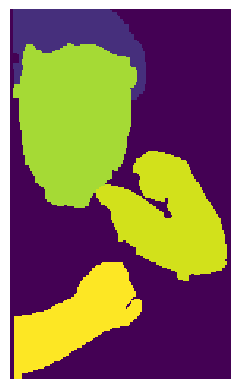

In [67]:
visualize_image(image_path)

In [73]:
train_seg_images.index('2575_521118.png') # 9055
input_images = train_seg_images[9055:9056]
image_path = os.path.join(train_seg_path, '2575_521118.png')

In [74]:
check_image(train_seg_path, input_images)

Processing images: 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]


[['2575_521118.png',
  [0, 1, 2, 5, 12, 13, 14, 15, 16, 17, 18, 19],
  ['Back_ground',
   'Face',
   'Hair',
   'Hat',
   'Left_arm',
   'Left_leg',
   'Left_shoe',
   'Right_arm',
   'Right_leg',
   'Right_shoe',
   'Skirt',
   'UpperClothes']]]

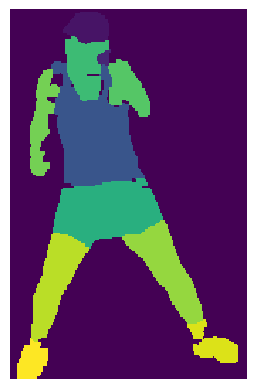

In [75]:
visualize_image(image_path)

In [112]:
def check_image(base_path, images, label_dict=label2index): # Folder and image path specification required
    
    # Ourput
    Output_lst = [] # image_name, indexs, pixcel_values
    
    
    # Import image path
    images_path = [os.path.join(base_path, image) for image in images]
    # print(images_path)
    
    
    # Define Image size
    for img_path in tqdm(images_path, desc="Processing images"):
        
        segmentation_image = Image.open(img_path)
        width, height = segmentation_image.size

        # print(image)
        # print(f'Type: {type(segmentation_image)}')
        # print(f'Size of Image: {segmentation_image.size}')
        # print(f'Width of Image: {width}')
        # print(f'Height of Image: {height}')
        # segmentation_image.show()
        
        
        # Check pixel values
        pixcel_values = []
        label_names = []
        for y in range(height): 
            for x in range(width):
                pixel_value = segmentation_image.getpixel((x, y))
                label_name = list(label2index.keys())[list(label2index.values()).index(pixel_value)]
                pixcel_values.append(pixel_value)
                label_names.append(label_name)
                
                # print(image)
                # print(f"Pixcel value at coordinate({x}, {y}): {pixel_value}")
                # print(f'Class: {label_name}')
                # print(f'Index: {pixel_value}, Class: {label_name}', '\n')

            index_lst = list(set(pixcel_values)) # non-duplicated
            label_lst = list(set(label_names))
        
            index_lst.sort()
            label_lst.sort()
            
        # visualize image
        # segmentation_image.show()
        
        
        # Get image name
        image_name = os.path.basename(img_path)
        
        
        # Append Outputs
        Output_lst.append([image_name, index_lst, label_lst, pixcel_values, (width, height)])
        
    return Output_lst

In [113]:
train_seg_images.index('2585_2204833.png') # 9138
input_images = train_seg_images[9138:9139]
image_path = os.path.join(train_seg_path, '2585_2204833.png')

In [114]:
aa = check_image(train_seg_path, input_images)

Processing images: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


In [127]:
aa

[['2585_2204833.png',
  [0, 2, 5, 6, 13, 14, 15],
  ['Back_ground',
   'Dress',
   'Face',
   'Hair',
   'Left_arm',
   'Right_arm',
   'UpperClothes'],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
 

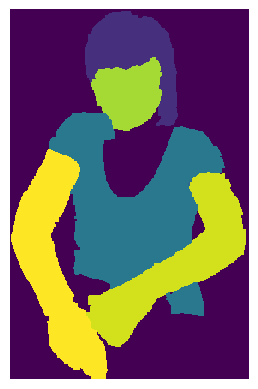

In [115]:
visualize_image(image_path)

In [105]:
aa[0][0]

'2585_2204833.png'

In [119]:
aa[0][4]

(279, 432)

In [120]:
data_array = np.array(aa[0][3])
data_array.shape

image_height = aa[0][4][1]  # 이미지의 높이
image_width = aa[0][4][0]   # 이미지의 너비
data_array = data_array.reshape(image_height, image_width)

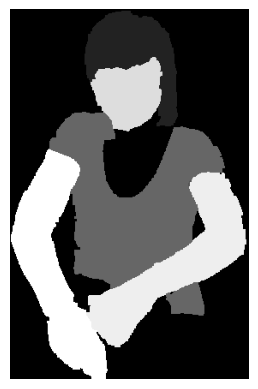

In [121]:
# 이미지 시각화
plt.imshow(data_array, cmap='gray')  # 흑백 이미지로 시각화
plt.axis('off')  # 축 제거
plt.show()

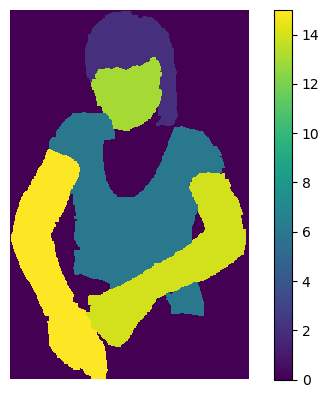

In [122]:
# 이미지 시각화
plt.imshow(data_array, cmap='viridis', interpolation='nearest')  # 픽셀 값을 그대로 표현
plt.axis('off')  # 축 제거
plt.colorbar()   # 컬러 바 추가
plt.show()

In [129]:
data_array = np.array(aa[0][3])
print(data_array.shape)

image_height = aa[0][4][1]  # 이미지의 높이
image_width = aa[0][4][0]   # 이미지의 너비

data_array = data_array.reshape(image_height, image_width)
print(data_array.shape)

(120528,)
(432, 279)


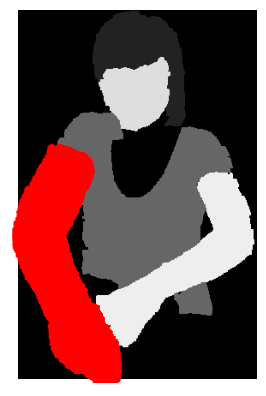

In [130]:
# 픽셀 값이 15인 위치 찾기
indices_15 = np.argwhere(data_array == 15)

# 이미지 시각화
plt.imshow(data_array, cmap='gray')  # 흑백 이미지로 표현

# 각 픽셀에 숫자 값 표시
for idx in indices_15:
    plt.text(idx[1], idx[0], str(data_array[idx[0], idx[1]]), ha='center', va='center', color='red')

plt.axis('off')  # 축 제거
plt.show()


In [133]:
INDEX = [0, 2, 5, 6, 13, 14, 15],
LABELS = [
    'Back_ground',
    'Dress',
    'Face',
    'Hair',
    'Left_arm',
    'Right_arm',
    'UpperClothes'
    ]

C:\Users\JAY\AppData\Local\Temp\ipykernel_9256\2880344248.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  indices_15 = np.argwhere(data_array == index)


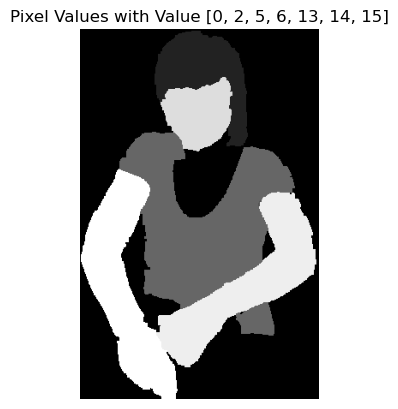

In [134]:
for index in INDEX:
    # 픽셀 값 위치 찾기
    indices_15 = np.argwhere(data_array == index)

    # 이미지 시각화
    plt.imshow(data_array, cmap='gray')  # 흑백 이미지로 표현

    # 각 픽셀에 숫자 값 표시
    for idx in indices_15:
        plt.text(idx[1], idx[0], str(data_array[idx[0], idx[1]]), ha='center', va='center', color='red')

    plt.title(f'Pixel Values with Value {index}')
    plt.axis('off')  # 축 제거
    plt.show()
        

C:\Users\JAY\AppData\Local\Temp\ipykernel_9256\597583827.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  indices = np.argwhere(data_array == index)


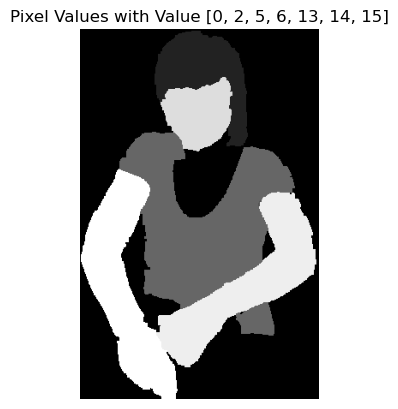

In [139]:
import numpy as np
import matplotlib.pyplot as plt



data_array = np.array(aa[0][3])
# print(data_array.shape)

image_height = aa[0][4][1]  # 이미지의 높이
image_width = aa[0][4][0]   # 이미지의 너비

data_array = data_array.reshape(image_height, image_width)

# # 주어진 데이터
# # data = [0, 0, 0, 0, 1, 0, 1, 0, 15, 15, 15, 0, 0, 0, 0, 0]  # 예시 데이터
# image_height = 4  # 이미지의 높이
# image_width = 4   # 이미지의 너비

# # 데이터를 이미지 크기에 맞게 reshape
# data_array = np.array(data).reshape(image_height, image_width)

# 인덱스 리스트
# INDEX = [0, 1, 15]

INDEX = [0, 2, 5, 6, 13, 14, 15],
LABELS = [
    'Back_ground',
    'Dress',
    'Face',
    'Hair',
    'Left_arm',
    'Right_arm',
    'UpperClothes'
    ]


# 반복문으로 이미지 시각화
for index in INDEX:
    # 픽셀 값 위치 찾기
    indices = np.argwhere(data_array == index)

    # 이미지 시각화 및 픽셀 값 표시
    plt.figure()
    plt.imshow(data_array, cmap='gray')  # 흑백 이미지로 표현

    # 각 픽셀에 숫자 값 표시
    for idx in indices:
        plt.text(idx[1], idx[0], str(data_array[idx[0], idx[1]]), ha='center', va='center', color='red')

    plt.title(f'Pixel Values with Value {index}')
    plt.axis('off')  # 축 제거

plt.show()


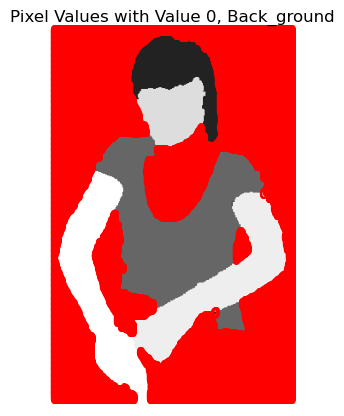

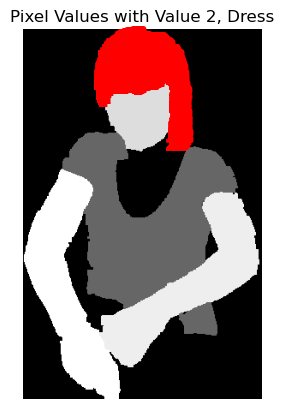

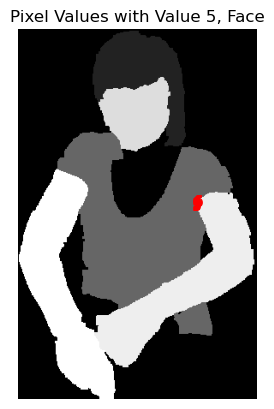

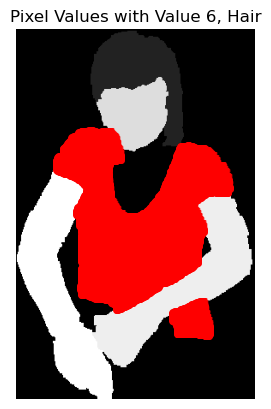

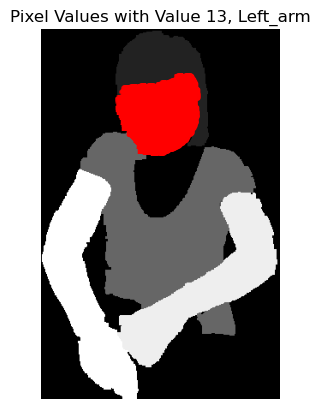

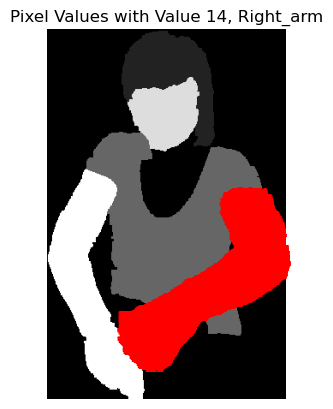

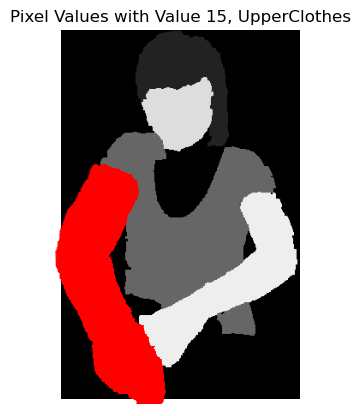

In [141]:
import numpy as np
import matplotlib.pyplot as plt

data_array = np.array(aa[0][3])
image_height, image_width = aa[0][4][1], aa[0][4][0]  # 이미지의 높이와 너비

# 데이터를 이미지 크기에 맞게 reshape
data_array = data_array.reshape(image_height, image_width)

INDEX = [0, 2, 5, 6, 13, 14, 15]  # 인덱스 리스트
LABELS = [
    'Back_ground',
    'Dress',
    'Face',
    'Hair',
    'Left_arm',
    'Right_arm',
    'UpperClothes'
]

# 반복문으로 이미지 시각화
for index in INDEX:
    # 픽셀 값 위치 찾기
    indices = np.argwhere(data_array == index)

    # 이미지 시각화 및 픽셀 값 표시
    plt.figure()
    plt.imshow(data_array, cmap='gray')  # 흑백 이미지로 표현

    # 각 픽셀에 숫자 값 표시
    for idx in indices:
        plt.text(idx[1], idx[0], str(data_array[idx[0], idx[1]]), ha='center', va='center', color='red')

    plt.title(f'Pixel Values with Value {index}, {LABELS[INDEX.index(index)]}')
    plt.axis('off')  # 축 제거

plt.show()


In [147]:
train_seg_images.index('2575_521118.png') # 9055
input_images = train_seg_images[9055:9056]
image_path = os.path.join(train_seg_path, '2575_521118.png')

In [148]:
aa = check_image(train_seg_path, input_images)

Processing images: 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]


In [149]:
aa

[['2575_521118.png',
  [0, 1, 2, 5, 12, 13, 14, 15, 16, 17, 18, 19],
  ['Back_ground',
   'Face',
   'Hair',
   'Hat',
   'Left_arm',
   'Left_leg',
   'Left_shoe',
   'Right_arm',
   'Right_leg',
   'Right_shoe',
   'Skirt',
   'UpperClothes'],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0

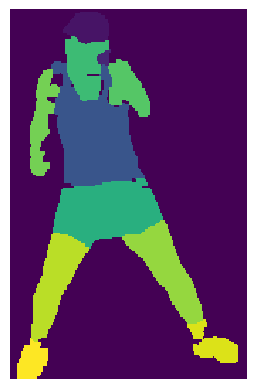

In [146]:
visualize_image(image_path)

In [153]:
aa[0][1]

[0, 1, 2, 5, 12, 13, 14, 15, 16, 17, 18, 19]

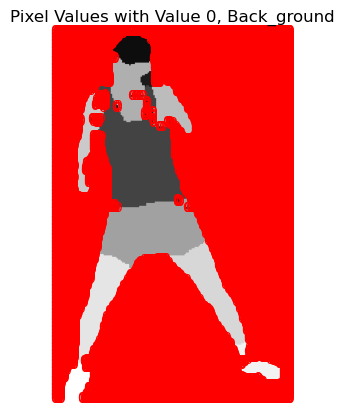

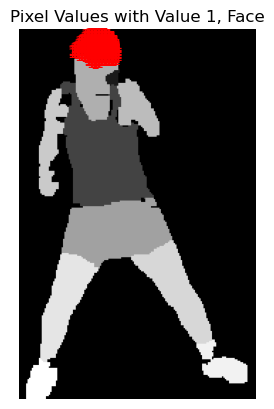

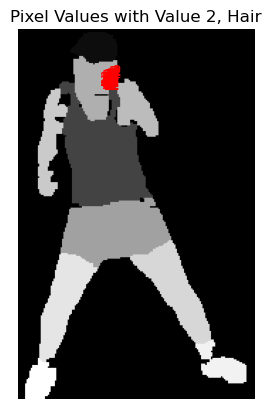

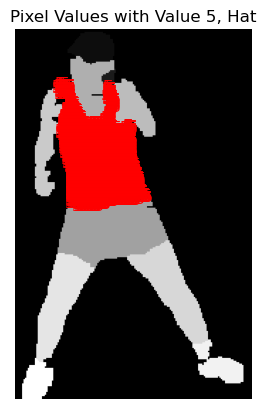

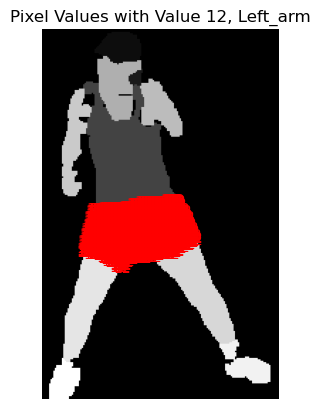

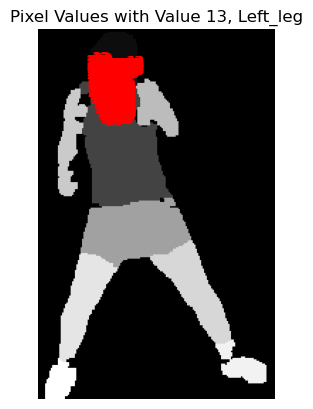

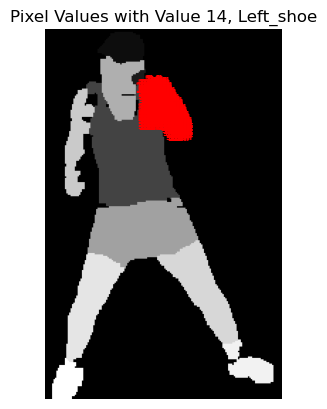

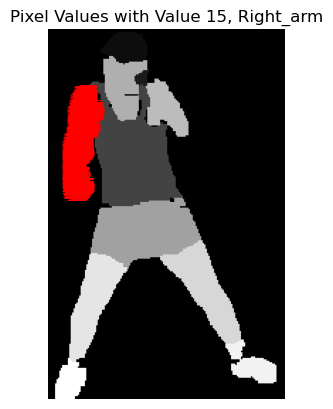

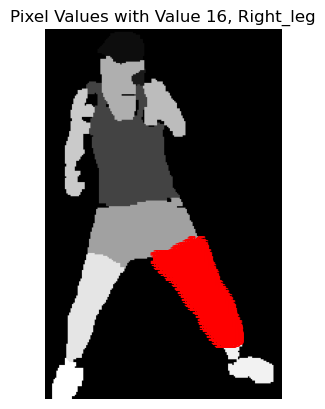

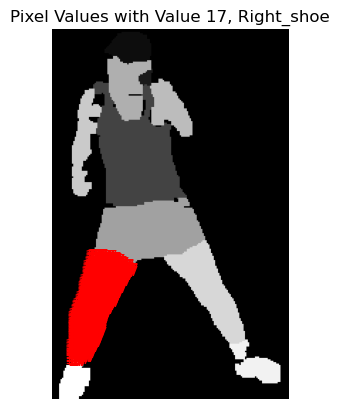

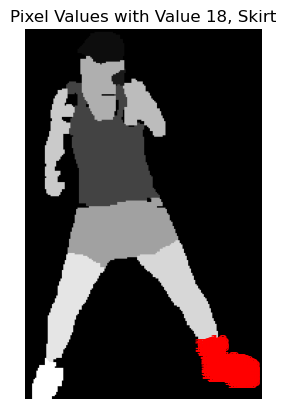

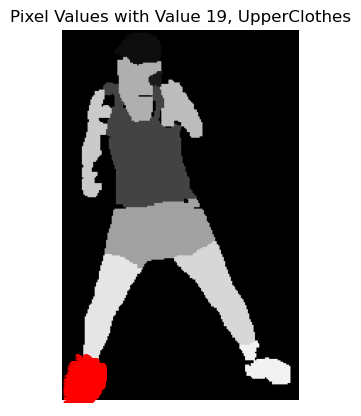

In [154]:
import numpy as np
import matplotlib.pyplot as plt



data_array = np.array(aa[0][3])
image_height, image_width = aa[0][4][1], aa[0][4][0]  # 이미지의 높이와 너비

# 데이터를 이미지 크기에 맞게 reshape
data_array = data_array.reshape(image_height, image_width)

INDEX = aa[0][1]  # 인덱스 리스트
LABELS = aa[0][2]

# 반복문으로 이미지 시각화
for index in INDEX:
    # 픽셀 값 위치 찾기
    indices = np.argwhere(data_array == index)

    # 이미지 시각화 및 픽셀 값 표시
    plt.figure()
    plt.imshow(data_array, cmap='gray')  # 흑백 이미지로 표현

    # 각 픽셀에 숫자 값 표시
    for idx in indices:
        plt.text(idx[1], idx[0], str(data_array[idx[0], idx[1]]), ha='center', va='center', color='red')

    plt.title(f'Pixel Values with Value {index}, {LABELS[INDEX.index(index)]}')
    plt.axis('off')  # 축 제거

plt.show()


In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from tqdm import tqdm

def check_image(base_path, images, label_dict=label2index): # Folder and image path specification required
    
    # Ourput
    Output_lst = [] # image_name, indexs, pixcel_values
    
    
    # Import image path
    images_path = [os.path.join(base_path, image) for image in images]
    # print(images_path)
    
    
    # Define Image size
    for img_path in tqdm(images_path, desc="Processing images"):
        
        segmentation_image = Image.open(img_path)
        width, height = segmentation_image.size

        # print(image)
        # print(f'Type: {type(segmentation_image)}')
        # print(f'Size of Image: {segmentation_image.size}')
        # print(f'Width of Image: {width}')
        # print(f'Height of Image: {height}')
        # segmentation_image.show()
        
        
        # Check pixel values
        pixcel_values = []
        label_names = []
        for y in range(height): 
            for x in range(width):
                pixel_value = segmentation_image.getpixel((x, y))
                label_name = list(label2index.keys())[list(label2index.values()).index(pixel_value)]
                pixcel_values.append(pixel_value)
                label_names.append(label_name)
                
                # print(image)
                # print(f"Pixcel value at coordinate({x}, {y}): {pixel_value}")
                # print(f'Class: {label_name}')
                # print(f'Index: {pixel_value}, Class: {label_name}', '\n')

            index_lst = list(set(pixcel_values)) # non-duplicated
            label_lst = list(set(label_names))
        
            index_lst.sort()
            label_lst.sort()
            
        # visualize image
        segmentation_image.show()
        
        
        # Get image name
        image_name = os.path.basename(img_path)
        
        
        # Append Outputs
        Output_lst.append([image_name, index_lst, label_lst, (width, height)])
    
    
    return Output_lst

In [ ]:
train_seg_path = 'D:\\알파코\\Human_Parsing_Dataset\\LIP-20240218T075508Z-001\\LIP\\TrainVal_parsing_annotations\\TrainVal_parsing_annotations\\TrainVal_parsing_annotations\\train_segmentations'
train_seg_images = sorted(os.listdir(train_seg_path))
input_images = train_seg_images[120:121]

In [156]:
folder_path = "C:\\Users\\JAY\\Desktop\\Pascal"
seg_imgs = sorted(os.listdir(folder_path))

seg_imgs

['01_01_F009_01.png', '01_01_F009_08.png']